In [1]:
import collections
import numpy as np
import random
import pickle
import time
import matplotlib.pyplot as plt
%matplotlib inline
from Env import TicTacToe

In [2]:
env = TicTacToe()

In [3]:
def q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan', 'x')

def valid_actions(state):
    valid_Actions = []
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

def add_to_dict(state):
    state1 = q_state(state)
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action] = 0

In [4]:
def epsilon_greedy(state, step_count, z):
    if step_count>z:
        q_states = q_state(state)
        action = max(Q_dict[q_states], key=Q_dict[q_states].get)
    else:
        action = random.choice(valid_actions(state))
    return action

In [5]:
Q_dict = collections.defaultdict(dict)
State_track = collections.defaultdict(dict)

In [6]:
def initialize_track_states():
    sample_q = [('x-x-x-x-x-x-x-x-x', (5,9)), \
                ('x-x-x-x-x-x-x-6-1', (0,3)), \
                ('4-x-x-x-x-x-x-x-7', (4,1)), \
                ('x-x-x-x-x-x-x-8-5', (4,9)), \
                ]
    for q_vals in sample_q:
        state = q_vals[0]
        action = q_vals[1]
        State_track[state][action] = []
    

In [7]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [13]:
def save_tracking_states():
    for state in State_track.keys():
        for action in State_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                State_track[state][action].append(Q_dict[state][action])

In [9]:
initialize_track_states()

In [10]:
EPISODES = 50000
LR = 0.1
GAMMA = 0.95
DEBUG = False

In [11]:
def run_agent(z, episodes=EPISODES, lr =LR, gamma=GAMMA, debug=DEBUG, env=env):
    start_time = time.time()
    summary = {10:0, -10:0, 0:0}
    total_steps = 0

    for episode in range(episodes):
        env  = TicTacToe()
        current_state = env.state
        add_to_dict(current_state)

        step_count = 0
        total_reward = 0
        terminated = False

        if debug:
            print()
            print('episode ', episode)
            print(str(current_state[0]).replace('nan', 'x'), str(current_state[1]).replace('nan', 'x'), str(current_state[2]).replace('nan','x'))
            print(str(current_state[3]).replace('nan', 'x'), str(current_state[4]).replace('nan', 'x'), str(current_state[5]).replace('nan','x'))
            print(str(current_state[6]).replace('nan', 'x'), str(current_state[7]).replace('nan', 'x'), str(current_state[8]).replace('nan','x'))
            print()

        while terminated == False:
            current_action = epsilon_greedy(current_state, step_count, z)
            next_state, reward, terminated = env.step(current_state, current_action)
            add_to_dict(next_state)

            next_q_state = q_state(next_state)
            current_q_state = q_state(current_state)
            if len(Q_dict[next_q_state])>0:
                max_next = max(Q_dict[next_q_state], key=Q_dict[next_q_state].get)
                Q_dict[current_q_state][current_action] += lr*((reward + (gamma *(Q_dict[next_q_state][max_next]))) - Q_dict[current_q_state][current_action])

            current_state = next_state
            total_reward = total_reward+1
            step_count = step_count+1

            if debug:
                print(str(current_state[0]).replace('nan', 'x'), str(current_state[1]).replace('nan', 'x'), str(current_state[2]).replace('nan','x'))
                print(str(current_state[3]).replace('nan', 'x'), str(current_state[4]).replace('nan', 'x'), str(current_state[5]).replace('nan','x'))
                print(str(current_state[6]).replace('nan', 'x'), str(current_state[7]).replace('nan', 'x'), str(current_state[8]).replace('nan','x'))
                print()
        summary[reward] = summary[reward]+1
        total_steps = total_steps + step_count
        if debug:
            print("Results Reward :", reward)
        save_tracking_states()

    elapsed_time = time.time() - start_time
    save_obj(State_track, 'states_traked')
    save_obj(Q_dict, 'Policy')

    return elapsed_time, summary, round(total_steps/episodes, 2)

In [14]:
df = {'z':[], 'run_time':[], 'win_count':[], 'loose_count':[], 'tie_count':[], 'average_step_per_episode':[]}
env = TicTacToe()
for z in range(-1, 6):
    Q_dict = collections.defaultdict(dict)
    States_track = collections.defaultdict(dict)
    run_time, reward_summary, average_steps_per_episode = run_agent(z, episodes=50000, env=env)
    df['z'].append(z)
    df['run_time'].append(run_time)
    df['win_count'].append(reward_summary[10])
    df['loose_count'].append(reward_summary[-10])
    df['tie_count'].append(reward_summary[0])
    df['average_step_per_episode'].append(average_steps_per_episode)
    print('Completed!')

Completed!
Completed!
Completed!
Completed!
Completed!
Completed!
Completed!


In [15]:
df

{'z': [-1, 0, 1, 2, 3, 4, 5],
 'run_time': [34.16510534286499,
  44.02309489250183,
  46.30217170715332,
  36.79861116409302,
  35.39272427558899,
  36.39634299278259,
  42.7017240524292],
 'win_count': [13625, 13540, 13194, 12820, 12417, 12362, 12598],
 'loose_count': [13310, 13518, 13699, 13967, 14338, 14387, 14131],
 'tie_count': [23065, 22942, 23107, 23213, 23245, 23251, 23271],
 'average_step_per_episode': [4.37, 4.37, 4.37, 4.38, 4.37, 4.38, 4.38]}

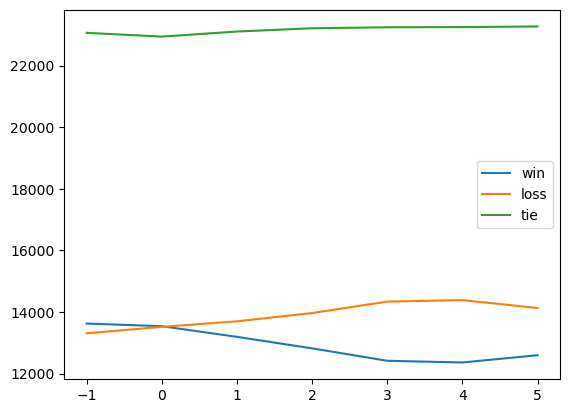

In [16]:
xaxis = np.asarray(df['z'])
plt.plot(xaxis, np.asarray(df['win_count']))
plt.plot(xaxis, np.asarray(df['loose_count']))
plt.plot(xaxis, np.asarray(df['tie_count']))
plt.gca().legend(('win', 'loss', 'tie'))
plt.show()